In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
19,240 cases (7 day average) as of Thu 01 Jul, +1,242.1 since Wed 30 Jun
310 hospitalised (7 day average) as of Sun 04 Jul, +23.4 since Sat 03 Jul
13 died (7 day average) as of Thu 01 Jul, -1.1 since Wed 30 Jun


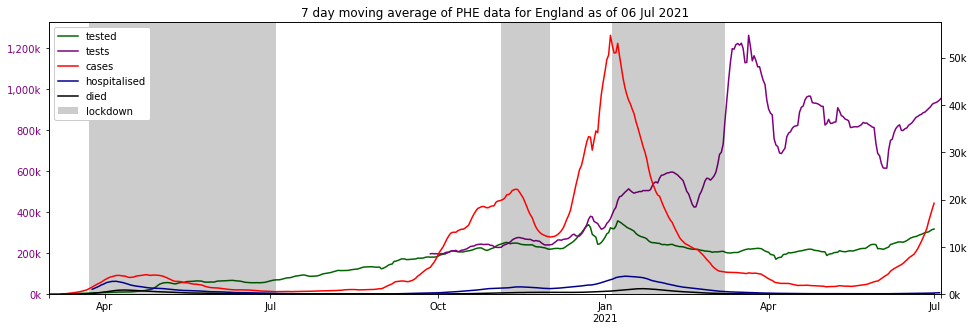

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

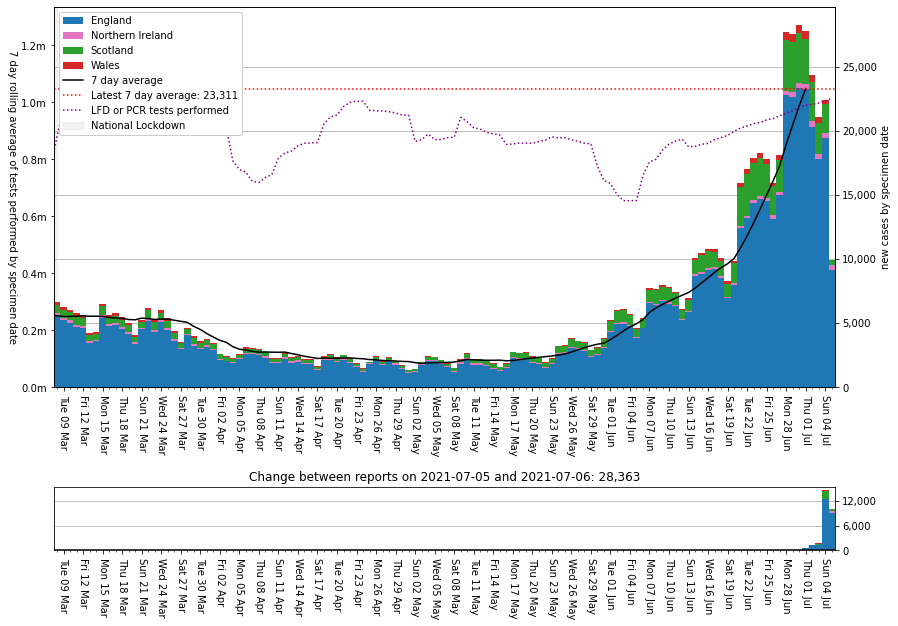

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

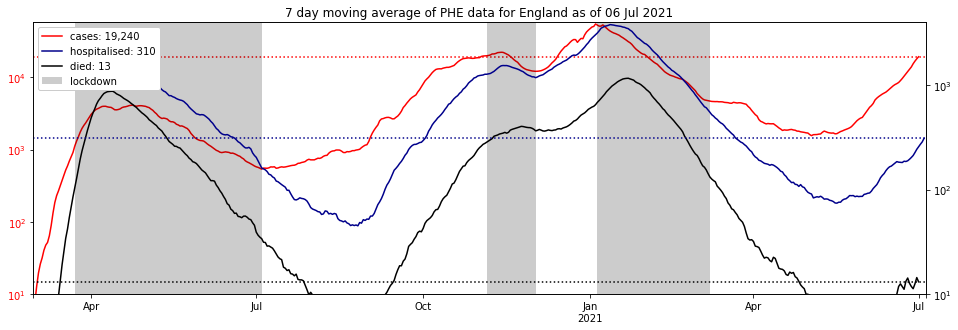

In [5]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,),
             right_series=(s.new_admissions_sum, s.new_deaths_sum))

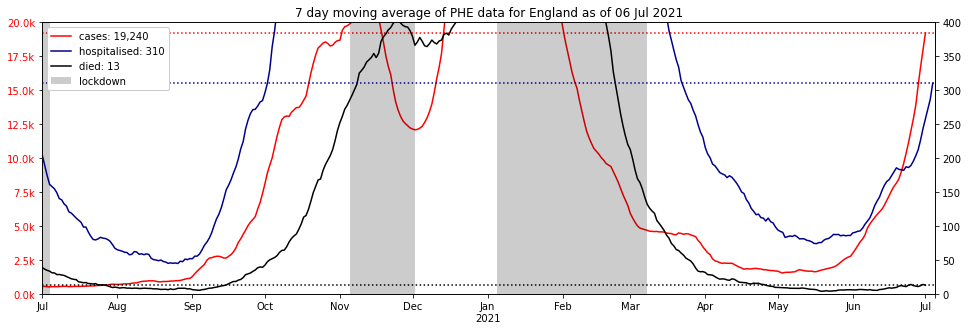

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=20_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=400)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,05 Jul 21,"+28,432,362","+38,108,016","+28,432,362","+107,977","+63,859","+107,977"
Northern Ireland,05 Jul 21,"+904,607","+1,175,151","+904,607","+7,398","+1,786","+7,398"
Scotland,05 Jul 21,"+2,791,071","+3,879,458","+2,791,071","+16,935","+10,235","+16,935"
Wales,05 Jul 21,"+1,746,136","+2,266,056","+1,746,136","+15,504","+1,082","+15,504"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,28432362.0,38108016.0,9675654.0,56286961,50.513230,17.189867,32.296903
1,Northern Ireland,N92000002,904607.0,1175151.0,270544.0,1893667,47.770120,14.286778,37.943102
2,Scotland,S92000003,2791071.0,3879458.0,1088387.0,5463300,51.087639,19.921787,28.990573
3,Wales,W92000004,1746136.0,2266056.0,519920.0,3152879,55.382271,16.490325,28.127404


'partial: 45,428,681 (68.0%), full: 33,874,176'

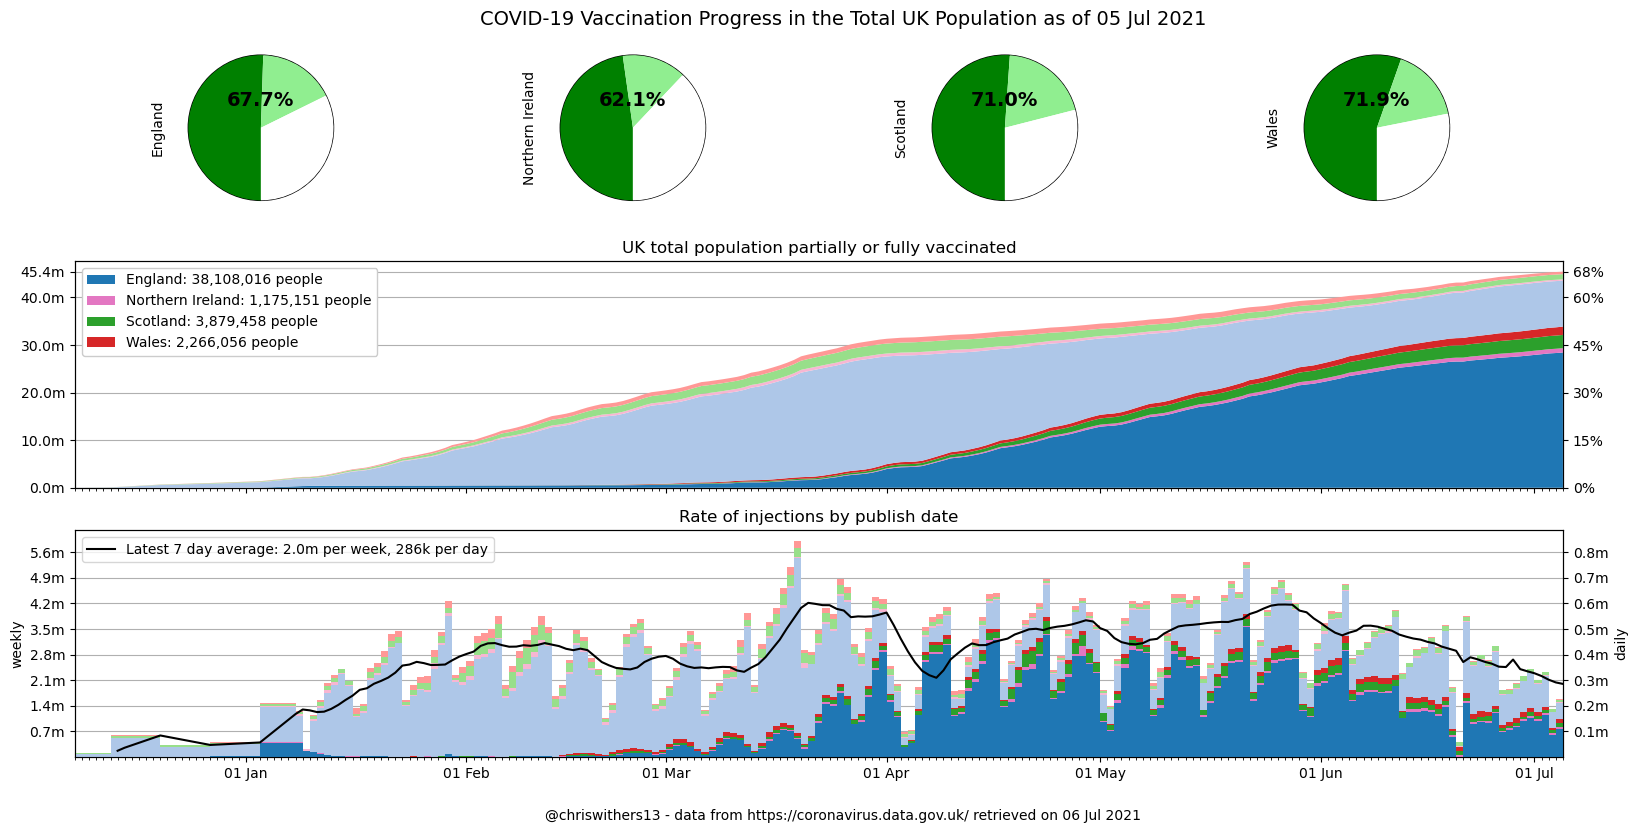

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

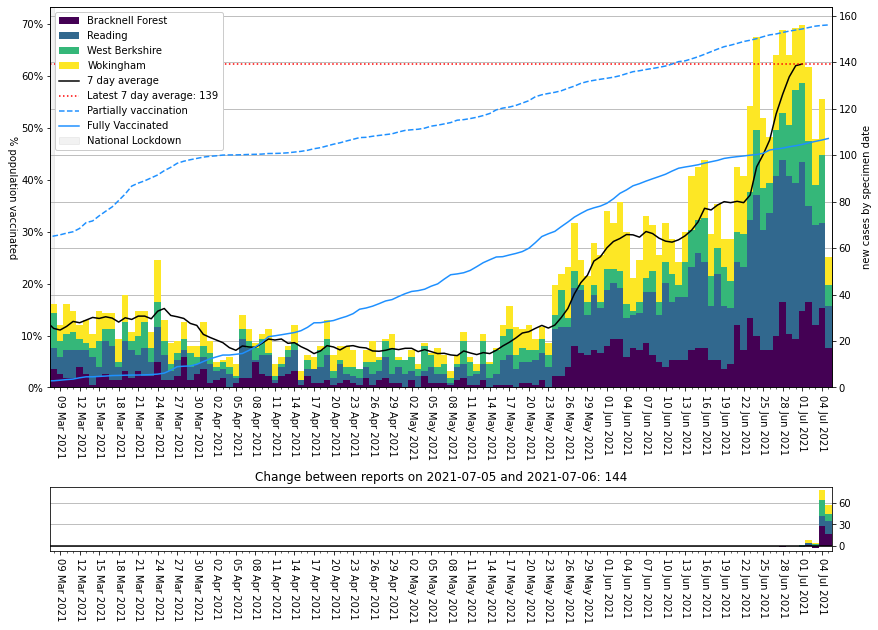

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=population_vaccinated)

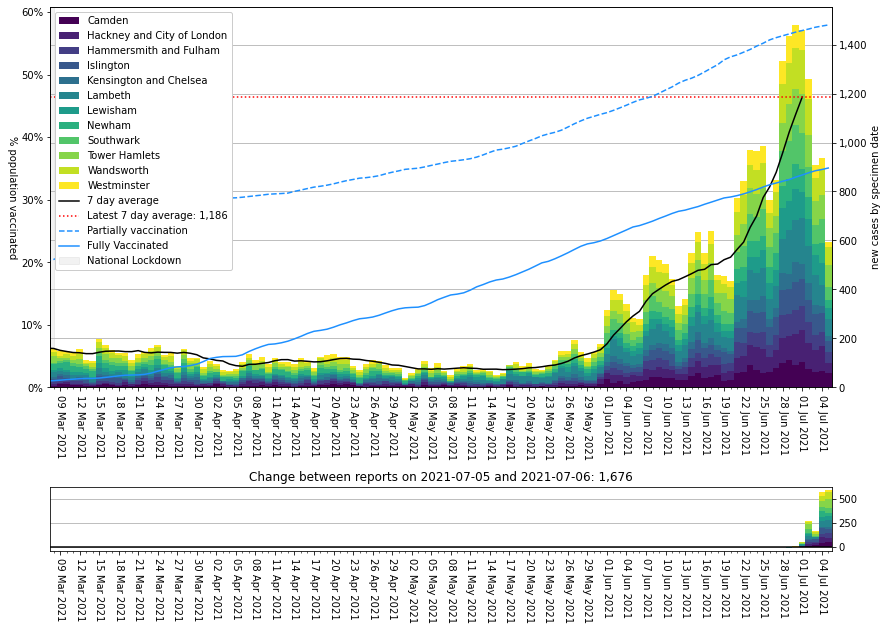

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000023,South Tyneside,912.065494,1377.0,2021-07-05
S12000042,Dundee City,751.406376,1122.0,2021-07-05
E08000024,Sunderland,707.945482,1966.0,2021-07-05
E08000037,Gateshead,683.972186,1382.0,2021-07-05
E07000199,Tamworth,679.305309,521.0,2021-07-05
E08000021,Newcastle upon Tyne,674.658213,2043.0,2021-07-05
E06000012,North East Lincolnshire,670.581526,1070.0,2021-07-05
S12000019,Midlothian,631.624486,584.0,2021-07-05
E06000047,County Durham,607.628081,3221.0,2021-07-05


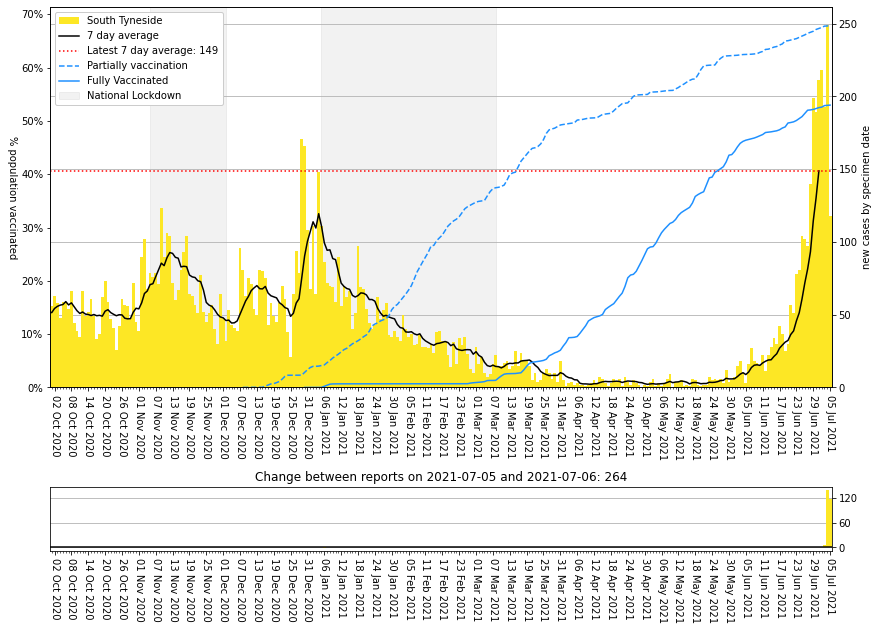

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,426.406973,3382.0,2021-07-05
E06000047,County Durham,607.628081,3221.0,2021-07-05
E08000025,Birmingham,269.482999,3077.0,2021-07-05
S12000049,Glasgow City,424.564064,2688.0,2021-07-05
S12000036,City of Edinburgh,482.159526,2531.0,2021-07-05
E08000003,Manchester,443.694403,2453.0,2021-07-05
E08000012,Liverpool,435.907012,2171.0,2021-07-05
E08000021,Newcastle upon Tyne,674.658213,2043.0,2021-07-05
E08000024,Sunderland,707.945482,1966.0,2021-07-05


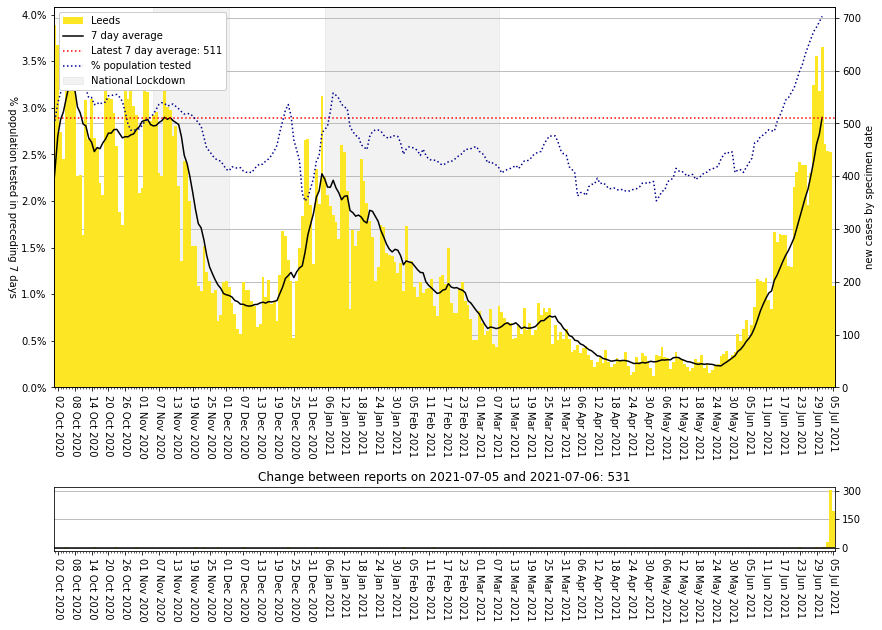

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 2.5
phe_max = 0.8

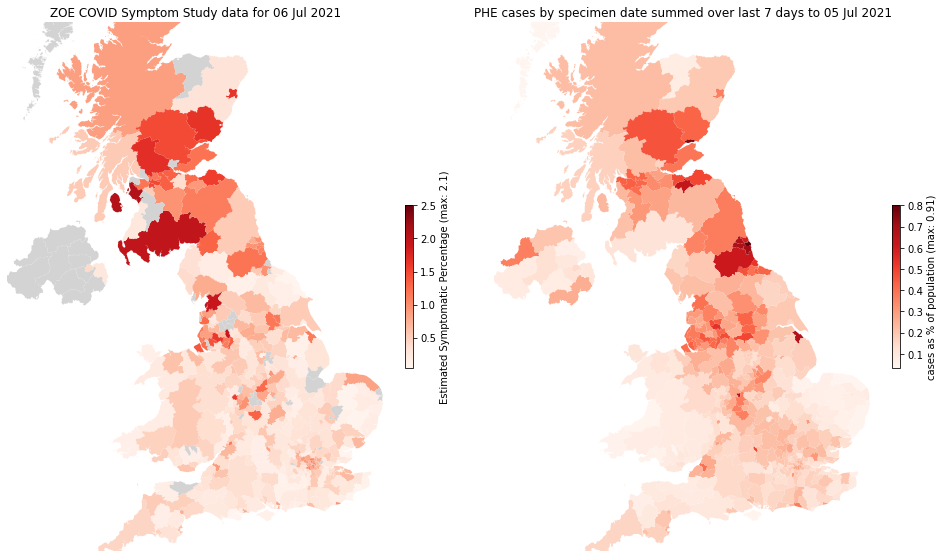

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...